In [12]:
### simple glm
library(caret)
library(ROCR)


Loading required package: gplots

Attaching package: 'gplots'

The following object is masked from 'package:stats':

    lowess



In [2]:
credit<-read.csv('C:\\Users\\Gaya\\Desktop\\R\\EDX_Scripts\\Principles-of-Machine-Learning-R-master\\Module4\\German_Credit_Preped.csv',stringsAsFactors = F)

str(credit)

'data.frame':	1000 obs. of  22 variables:
 $ Customer_ID             : int  1122334 6156361 2051359 8740590 3924540 3115687 8251714 2272783 1865292 8369450 ...
 $ checking_account_status : chr  "< 0 DM" "0 - 200 DM" "none" "< 0 DM" ...
 $ loan_duration_mo        : int  6 48 12 42 24 36 24 36 12 30 ...
 $ credit_history          : chr  "critical account - other non-bank loans" "current loans paid" "critical account - other non-bank loans" "current loans paid" ...
 $ purpose                 : chr  "radio/television" "radio/television" "education" "furniture/equipment" ...
 $ loan_amount             : int  1169 5951 2096 7882 4870 9055 2835 6948 3059 5234 ...
 $ savings_account_balance : chr  "unknown/none" "< 100 DM" "< 100 DM" "< 100 DM" ...
 $ time_employed_yrs       : chr  ">= 7 years" "1 - 4 years" "4 - 7 years" "4 - 7 years" ...
 $ payment_pcnt_income     : int  4 2 2 2 3 2 3 2 2 4 ...
 $ gender_status           : chr  "male-single" "female-divorced/separated/married" "male-single" 

In [3]:
credit$Customer_ID<-NULL
credit$bad_credit<-as.factor(ifelse(credit$bad_credit==1,'Yes','No'))
## Splitting into training and testing sets

In [4]:
ind<-createDataPartition(credit$bad_credit,p=0.7,list = F) 

In [5]:
credit_train<-credit[ind,]
credit_test<-credit[-ind,]

In [6]:
mod1<-glm(bad_credit~., data = credit_train,family='binomial')

summary(mod1)


Call:
glm(formula = bad_credit ~ ., family = "binomial", data = credit_train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.4648  -0.6546  -0.3108   0.6827   2.8577  

Coefficients:
                                                        Estimate Std. Error
(Intercept)                                           -1.620e+00  1.603e+00
checking_account_status> 200 DM or salary assignment  -7.180e-01  4.263e-01
checking_account_status0 - 200 DM                     -3.716e-01  2.747e-01
checking_account_statusnone                           -1.811e+00  2.907e-01
loan_duration_mo                                       2.961e-02  1.123e-02
credit_historycritical account - other non-bank loans -1.630e+00  5.242e-01
credit_historycurrent loans paid                      -7.346e-01  4.629e-01
credit_historyno credit - paid                         1.636e-01  6.896e-01
credit_historypast payment delays                     -8.550e-01  5.706e-01
purposecar (new)                

In [7]:
b_c_p1<-predict(mod1,credit_test,type='response')

b_c_p1_labels<-factor(ifelse(b_c_p1>0.3,'Yes','No'))

In [8]:
confusionMatrix(data =b_c_p1_labels,reference=credit_test$bad_credit,positive='Yes') # Important always note data and reference parameters namely.. position assignment fail often!!!

Confusion Matrix and Statistics

          Reference
Prediction  No Yes
       No  159  34
       Yes  51  56
                                        
               Accuracy : 0.7167        
                 95% CI : (0.662, 0.767)
    No Information Rate : 0.7           
    P-Value [Acc > NIR] : 0.28736       
                                        
                  Kappa : 0.3599        
 Mcnemar's Test P-Value : 0.08266       
                                        
            Sensitivity : 0.6222        
            Specificity : 0.7571        
         Pos Pred Value : 0.5234        
         Neg Pred Value : 0.8238        
             Prevalence : 0.3000        
         Detection Rate : 0.1867        
   Detection Prevalence : 0.3567        
      Balanced Accuracy : 0.6897        
                                        
       'Positive' Class : Yes           
                                        

In [9]:
table(b_c_p1_labels,credit_test$bad_credit)

             
b_c_p1_labels  No Yes
          No  159  34
          Yes  51  56

In [10]:
pred_prob<-predict(mod1,credit_test,type = 'response')
head(pred_prob)

6          9         12         17         19         21 
0.25480633 0.01198319 0.87462728 0.02235409 0.54510496 0.07685582

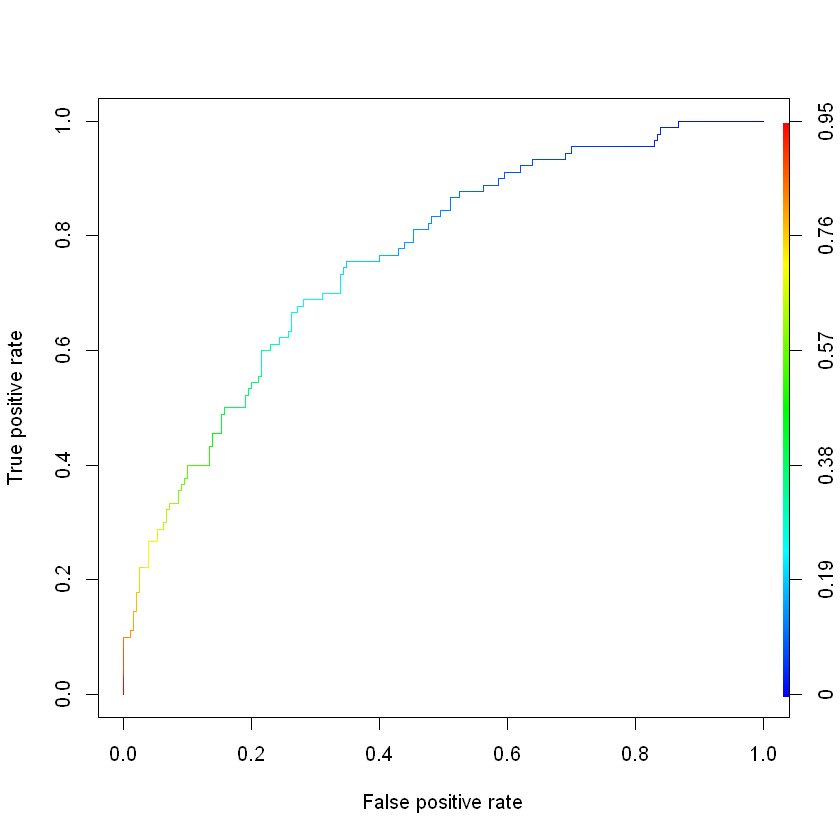

In [13]:
p_test<-prediction(pred_prob,credit_test$bad_credit)
perf<-performance(p_test,'tpr','fpr')
plot(perf,colorize=T)

In [14]:
performance(p_test,'auc')@y.values

[[1]]
[1] 0.7619577

Loading required package: glmnet
Loading required package: Matrix
Loading required package: foreach
Loaded glmnet 2.0-5

Warning message in train.default(x, y, weights = w, ...):
"The metric "Accuracy" was not in the result set. ROC will be used instead."

+ Fold01: alpha=0, lambda=0.03 
- Fold01: alpha=0, lambda=0.03 
+ Fold01: alpha=1, lambda=0.03 
- Fold01: alpha=1, lambda=0.03 
+ Fold02: alpha=0, lambda=0.03 
- Fold02: alpha=0, lambda=0.03 
+ Fold02: alpha=1, lambda=0.03 
- Fold02: alpha=1, lambda=0.03 
+ Fold03: alpha=0, lambda=0.03 
- Fold03: alpha=0, lambda=0.03 
+ Fold03: alpha=1, lambda=0.03 
- Fold03: alpha=1, lambda=0.03 
+ Fold04: alpha=0, lambda=0.03 
- Fold04: alpha=0, lambda=0.03 
+ Fold04: alpha=1, lambda=0.03 
- Fold04: alpha=1, lambda=0.03 
+ Fold05: alpha=0, lambda=0.03 
- Fold05: alpha=0, lambda=0.03 
+ Fold05: alpha=1, lambda=0.03 
- Fold05: alpha=1, lambda=0.03 
+ Fold06: alpha=0, lambda=0.03 
- Fold06: alpha=0, lambda=0.03 
+ Fold06: alpha=1, lambda=0.03 
- Fold06: alpha=1, lambda=0.03 
+ Fold07: alpha=0, lambda=0.03 
- Fold07: alpha=0, lambda=0.03 
+ Fold07: alpha=1, lambda=0.03 
- Fold07: alpha=1, lambda=0.03 
+ Fold08: alpha=0, lambda=0.03 
- Fold08: alpha=0, lambda=0.03 
+ Fold08: alpha=1, lambda=0.03 
- Fold08

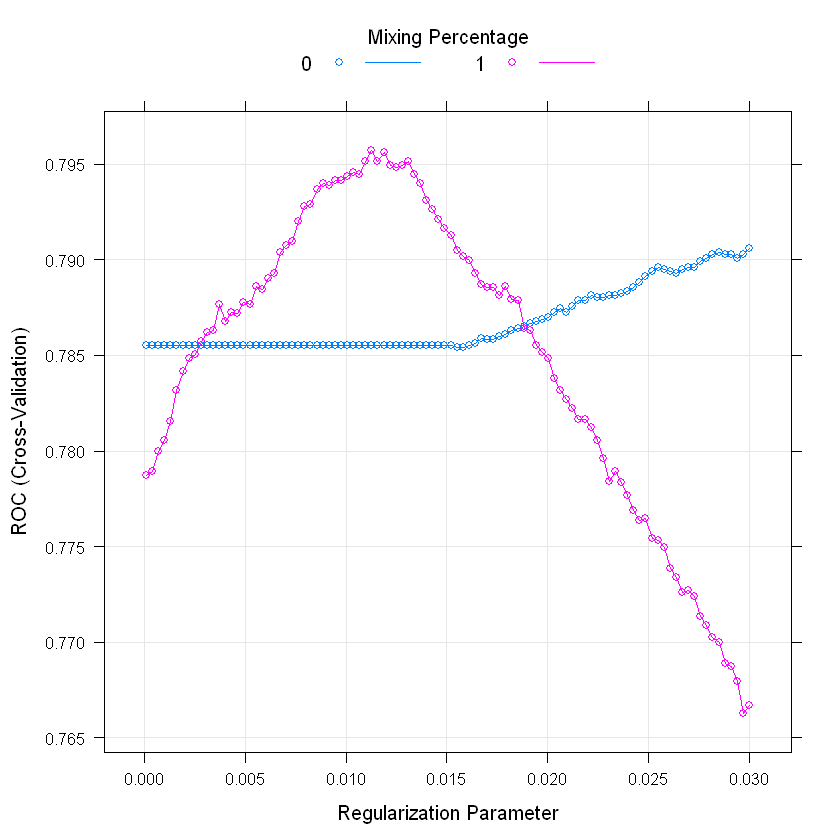

In [15]:
## Now let's use caret package

mod2<-train(bad_credit~.,data=credit_train,method='glmnet',
            tuneGrid=expand.grid(alpha=c(0,1),lambda=seq(0.0001,0.03,length=100)),
            trControl=trainControl(method = 'cv',number = 10,
                                   summaryFunction = twoClassSummary,
                                   classProbs = TRUE, ## Important!!!!
                                   #preProcess = 'medianImpute' ## if NAs in data
                                   verboseIter = TRUE))
plot(mod2)

In [16]:
max(mod2$results$Sens)

[1] 0.9428571

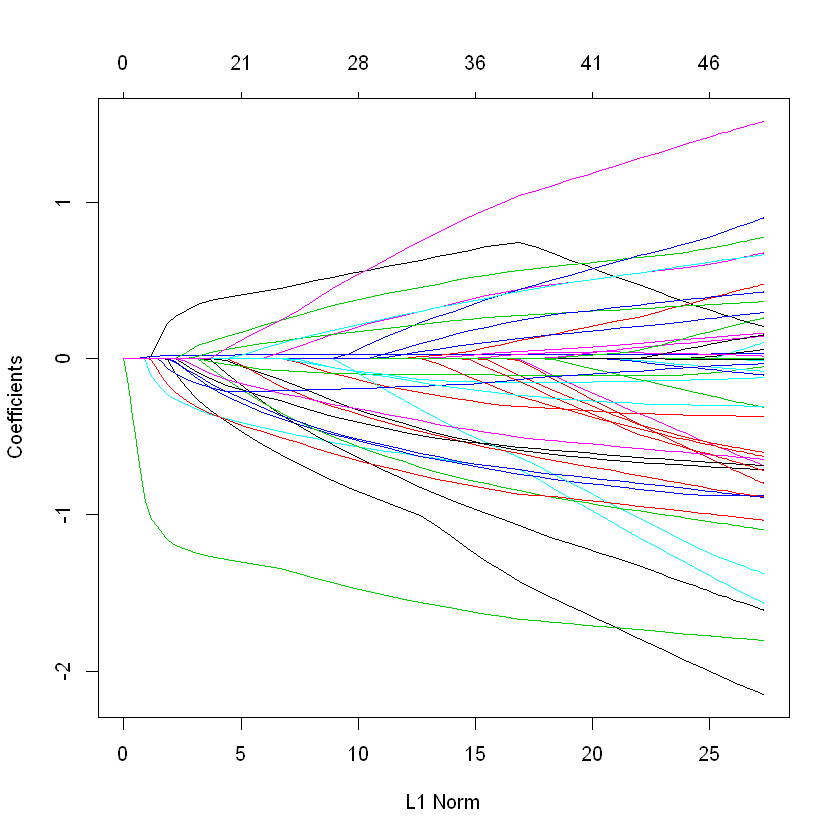

In [17]:
plot(mod2$finalModel)

In [18]:
mod2_pred<-predict(mod2,credit_test)

In [19]:
confusionMatrix(data =mod2_pred,reference=credit_test$bad_credit,positive='Yes') # Important always note data and reference parameters namely.. position assignment fail often!!!

Confusion Matrix and Statistics

          Reference
Prediction  No Yes
       No  190  54
       Yes  20  36
                                          
               Accuracy : 0.7533          
                 95% CI : (0.7005, 0.8011)
    No Information Rate : 0.7             
    P-Value [Acc > NIR] : 0.023885        
                                          
                  Kappa : 0.3416          
 Mcnemar's Test P-Value : 0.000125        
                                          
            Sensitivity : 0.4000          
            Specificity : 0.9048          
         Pos Pred Value : 0.6429          
         Neg Pred Value : 0.7787          
             Prevalence : 0.3000          
         Detection Rate : 0.1200          
   Detection Prevalence : 0.1867          
      Balanced Accuracy : 0.6524          
                                          
       'Positive' Class : Yes             
                                          

In [20]:
table(mod2_pred,credit_test$bad_credit)

         
mod2_pred  No Yes
      No  190  54
      Yes  20  36

In [21]:
pred_prob<-predict(mod2,credit_test,type = 'prob')
head(pred_prob)

No,Yes
0.8053642,0.19463582
0.9589059,0.04109413
0.2161694,0.78383058
0.9503947,0.04960526
0.4519993,0.54800073
0.9071066,0.09289343


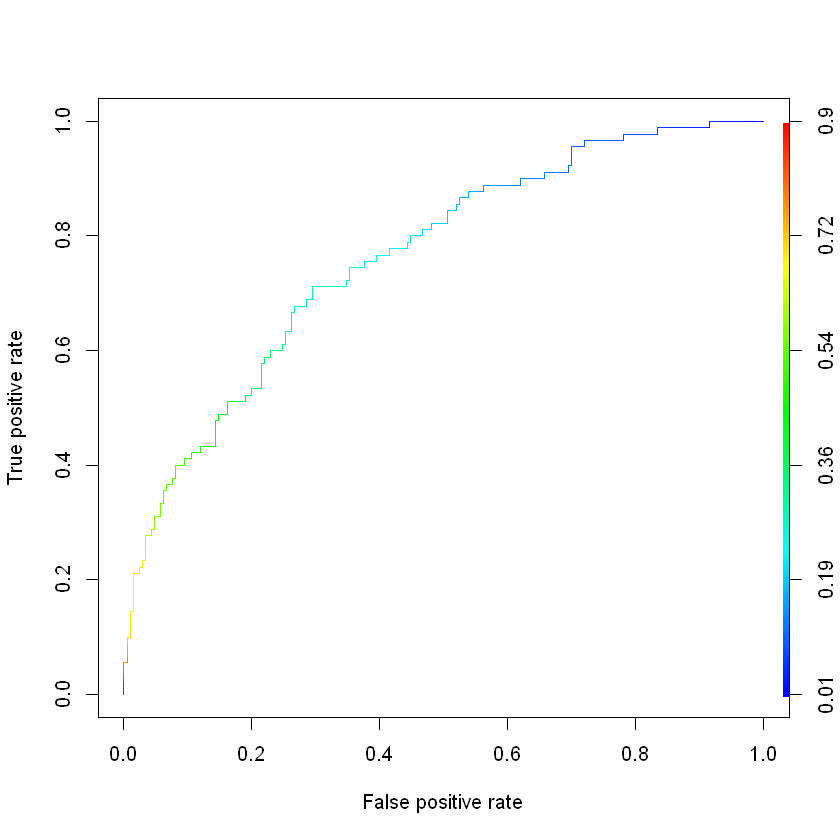

In [22]:
p_test<-prediction(pred_prob[,2],credit_test$bad_credit)
perf<-performance(p_test,'tpr','fpr')
plot(perf,colorize=T)

In [23]:
performance(p_test,'auc')@y.values

[[1]]
[1] 0.7633862

In [47]:
####### caret with multiple model, preProcessing etc.
library(dplyr)
library(ranger)

In [26]:
data(mtcars)
set.seed(42)
mtcars[sample(1:nrow(mtcars), 10), "hp"] <- NA
Y <- mtcars$mpg
X <- mtcars%>%
  select(-mpg)

In [27]:
str(mtcars)
set.seed(42)
mod3<-train(x=X,y=Y,method='lm',trControl=trainControl(method='cv',number = 10),preProcess = c("medianImpute",'center','scale'))

'data.frame':	32 obs. of  11 variables:
 $ mpg : num  21 21 22.8 21.4 18.7 18.1 14.3 24.4 22.8 19.2 ...
 $ cyl : num  6 6 4 6 8 6 8 4 4 6 ...
 $ disp: num  160 160 108 258 360 ...
 $ hp  : num  110 110 93 NA 175 105 245 62 NA 123 ...
 $ drat: num  3.9 3.9 3.85 3.08 3.15 2.76 3.21 3.69 3.92 3.92 ...
 $ wt  : num  2.62 2.88 2.32 3.21 3.44 ...
 $ qsec: num  16.5 17 18.6 19.4 17 ...
 $ vs  : num  0 0 1 1 0 1 0 1 1 1 ...
 $ am  : num  1 1 1 0 0 0 0 0 0 0 ...
 $ gear: num  4 4 4 3 3 3 3 4 4 4 ...
 $ carb: num  4 4 1 1 2 1 4 2 2 4 ...


In [29]:
summary(mod3)


Call:
lm(formula = .outcome ~ ., data = dat)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.7092 -1.3046 -0.1712  1.2443  4.8985 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  20.0072     0.4844  41.306   <2e-16 ***
cyl           0.1514     2.0498   0.074   0.9418    
disp          0.8709     1.9563   0.445   0.6607    
hp           -0.7842     1.0049  -0.780   0.4439    
drat          0.5252     0.8792   0.597   0.5567    
wt           -3.7615     1.9540  -1.925   0.0679 .  
qsec          1.7357     1.3196   1.315   0.2026    
vs            0.0724     1.0598   0.068   0.9462    
am            1.2102     1.0337   1.171   0.2548    
gear          0.4811     1.1132   0.432   0.6700    
carb         -0.7096     1.2136  -0.585   0.5650    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.672 on 21 degrees of freedom
Multiple R-squared:  0.8668,	Adjusted R-squared:  0.8034 
F-statistic: 13.67 on 10 an

In [30]:
min(mod3$results$RMSE)

[1] 3.482734

In [31]:
X$bad <- 1 ## Adding constant

In [32]:
set.seed(42)
mod4<-train(x=X,y=Y,method='lm',trControl=trainControl(method='cv',number = 10),preProcess = c('zv','medianImpute','center','scale'))

summary(mod4)


Call:
lm(formula = .outcome ~ ., data = dat)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.7092 -1.3046 -0.1712  1.2443  4.8985 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  20.0072     0.4844  41.306   <2e-16 ***
cyl           0.1514     2.0498   0.074   0.9418    
disp          0.8709     1.9563   0.445   0.6607    
hp           -0.7842     1.0049  -0.780   0.4439    
drat          0.5252     0.8792   0.597   0.5567    
wt           -3.7615     1.9540  -1.925   0.0679 .  
qsec          1.7357     1.3196   1.315   0.2026    
vs            0.0724     1.0598   0.068   0.9462    
am            1.2102     1.0337   1.171   0.2548    
gear          0.4811     1.1132   0.432   0.6700    
carb         -0.7096     1.2136  -0.585   0.5650    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.672 on 21 degrees of freedom
Multiple R-squared:  0.8668,	Adjusted R-squared:  0.8034 
F-statistic: 13.67 on 10 an

In [33]:
min(mod4$results$RMSE)

[1] 3.482734

In [34]:
## Adding pca principal component analysis
set.seed(42)
mod5<-train(x=X,y=Y,method='lm',trControl=trainControl(method='cv',number = 10),preProcess = c('zv','medianImpute','center','scale','pca'))

In [35]:
summary(mod5) ## Interpretation needed to understand PC's
min(mod5$results$RMSE)



Call:
lm(formula = .outcome ~ ., data = dat)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.6428 -1.2501 -0.2501  1.5185  5.4964 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  20.0275     0.4487  44.635  < 2e-16 ***
PC1          -2.3360     0.2131 -10.964 3.02e-11 ***
PC2          -0.2979     0.2852  -1.045   0.3059    
PC3           1.3455     0.6089   2.210   0.0361 *  
PC4           0.5985     0.8741   0.685   0.4996    
PC5           0.6757     0.8770   0.770   0.4480    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.522 on 26 degrees of freedom
Multiple R-squared:  0.8531,	Adjusted R-squared:  0.8249 
F-statistic:  30.2 on 5 and 26 DF,  p-value: 4.81e-10


[1] 2.391693

In [38]:
## Testing several model with caret

library(caret)
library(C50)
data(churn)
table(churnTrain$churn) / nrow(churnTrain)


      yes        no 
0.1449145 0.8550855 

In [39]:
# Create train/test indexes
set.seed(42)
myFolds <- createFolds(churnTrain$churn, k = 5) ## In order to have all models trained on the same folds of data

In [40]:
i <- myFolds$Fold1
table(churnTrain$churn[i]) / length(i)


      yes        no 
0.1441441 0.8558559 

In [41]:
myControl <- trainControl(
  summaryFunction = twoClassSummary,
  classProbs = TRUE,
  verboseIter = TRUE,
  savePredictions = TRUE,
  index = myFolds
)

In [42]:
set.seed(42)
model_glmnet <- train(
  churn ~ ., churnTrain,
  metric = "ROC",
  method = "glmnet",
  tuneGrid = expand.grid(
    alpha = 0:1,
    lambda = 0:10/10
  ),
  trControl = myControl
)

+ Fold1: alpha=0, lambda=1 
- Fold1: alpha=0, lambda=1 
+ Fold1: alpha=1, lambda=1 
- Fold1: alpha=1, lambda=1 
+ Fold2: alpha=0, lambda=1 
- Fold2: alpha=0, lambda=1 
+ Fold2: alpha=1, lambda=1 
- Fold2: alpha=1, lambda=1 
+ Fold3: alpha=0, lambda=1 
- Fold3: alpha=0, lambda=1 
+ Fold3: alpha=1, lambda=1 
- Fold3: alpha=1, lambda=1 
+ Fold4: alpha=0, lambda=1 
- Fold4: alpha=0, lambda=1 
+ Fold4: alpha=1, lambda=1 
- Fold4: alpha=1, lambda=1 
+ Fold5: alpha=0, lambda=1 
- Fold5: alpha=0, lambda=1 
+ Fold5: alpha=1, lambda=1 
- Fold5: alpha=1, lambda=1 
Aggregating results
Selecting tuning parameters
Fitting alpha = 0, lambda = 0.2 on full training set


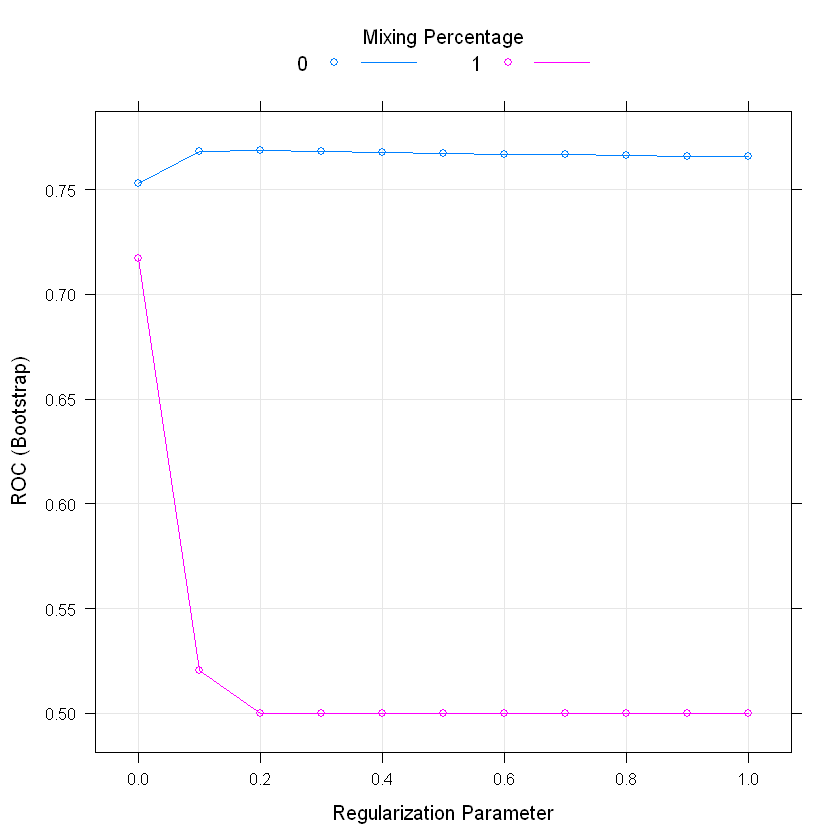

In [43]:
# Plot the results
plot(model_glmnet)

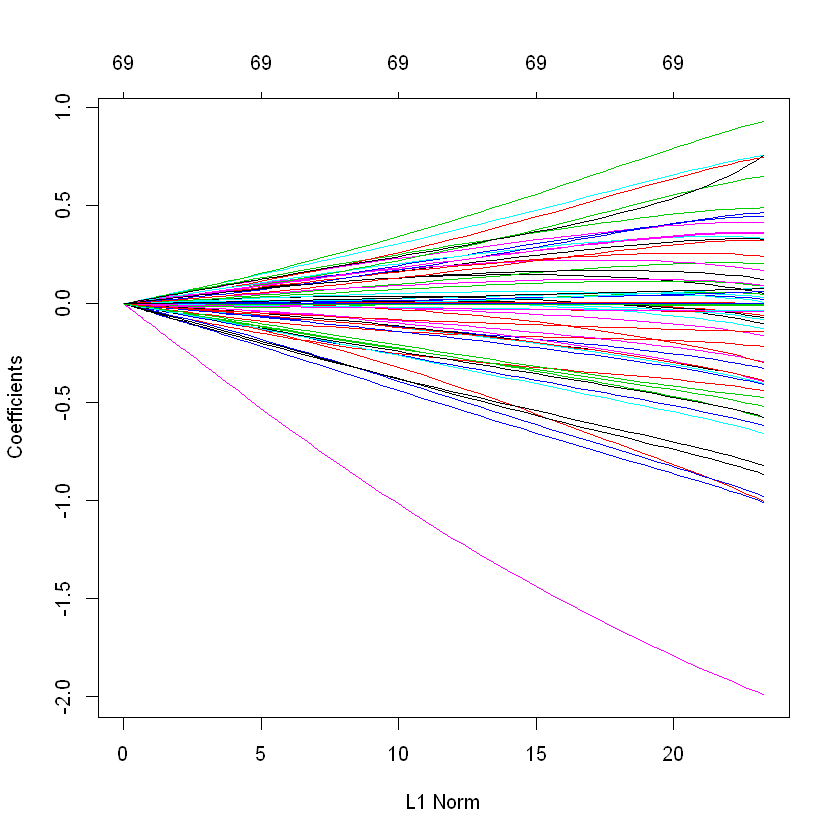

In [44]:
plot(model_glmnet$finalModel)

Loading required package: e1071


+ Fold1: mtry= 2 
- Fold1: mtry= 2 
+ Fold1: mtry=35 
- Fold1: mtry=35 
+ Fold1: mtry=69 
- Fold1: mtry=69 
+ Fold2: mtry= 2 
- Fold2: mtry= 2 
+ Fold2: mtry=35 
- Fold2: mtry=35 
+ Fold2: mtry=69 
- Fold2: mtry=69 
+ Fold3: mtry= 2 
- Fold3: mtry= 2 
+ Fold3: mtry=35 
- Fold3: mtry=35 
+ Fold3: mtry=69 
- Fold3: mtry=69 
+ Fold4: mtry= 2 
- Fold4: mtry= 2 
+ Fold4: mtry=35 
- Fold4: mtry=35 
+ Fold4: mtry=69 
- Fold4: mtry=69 
+ Fold5: mtry= 2 
- Fold5: mtry= 2 
+ Fold5: mtry=35 
- Fold5: mtry=35 
+ Fold5: mtry=69 
- Fold5: mtry=69 
Aggregating results
Selecting tuning parameters
Fitting mtry = 69 on full training set


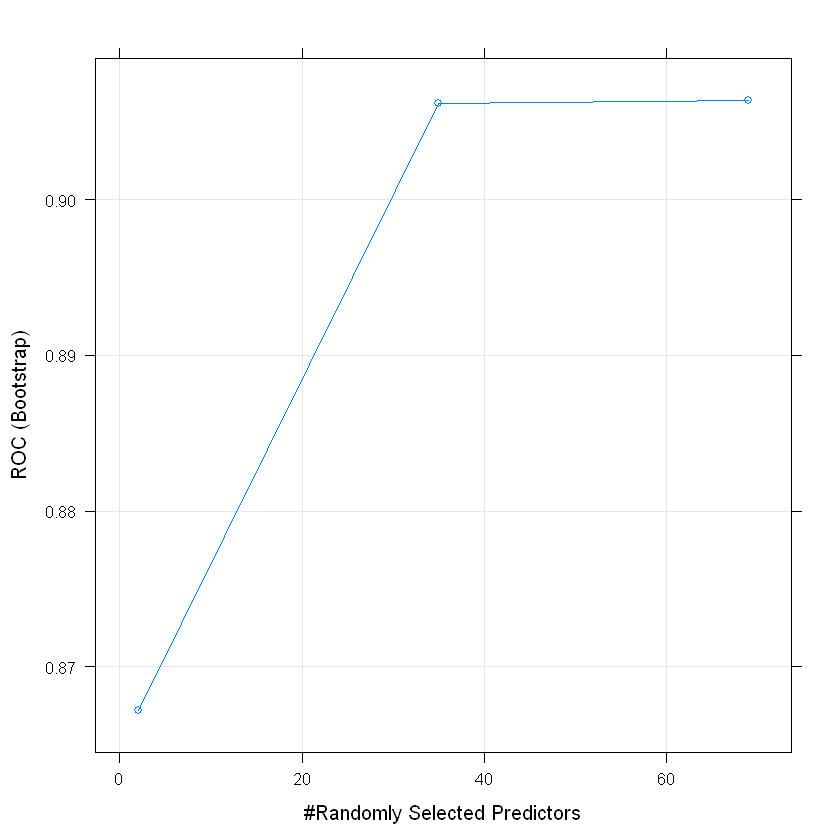

In [48]:
set.seed(42)
churnTrain$churn <- factor(churnTrain$churn, levels = c("no", "yes"))
model_rf <- train(
  churn ~ ., churnTrain,
  metric = "ROC",
  method = "ranger",
  trControl = myControl
)

plot(model_rf)

In [49]:
# Make a list
model_list <- list(
  glmnet = model_glmnet,
  rf = model_rf
)

In [50]:
# Collect resamples from the CV folds
resamps <- resamples(model_list)
resamps


Call:
resamples.default(x = model_list)

Models: glmnet, rf 
Number of resamples: 5 
Performance metrics: ROC, Sens, Spec 
Time estimates for: everything, final model fit 

In [51]:
summary(resamps)


Call:
summary.resamples(object = resamps)

Models: glmnet, rf 
Number of resamples: 5 

ROC 
         Min. 1st Qu. Median   Mean 3rd Qu.   Max. NA's
glmnet 0.7526  0.7624 0.7719 0.7686  0.7722 0.7840    0
rf     0.8961  0.9015 0.9077 0.9063  0.9112 0.9153    0

Sens 
          Min. 1st Qu.  Median    Mean 3rd Qu.    Max. NA's
glmnet 0.01036 0.01295 0.01809 0.01759 0.01813 0.02842    0
rf     0.97680 0.97810 0.98110 0.98110 0.98250 0.98680    0

Spec 
         Min. 1st Qu. Median   Mean 3rd Qu.   Max. NA's
glmnet 0.9991  0.9991 1.0000 0.9996  1.0000 1.0000    0
rf     0.6166  0.6580 0.6606 0.6739  0.7003 0.7339    0


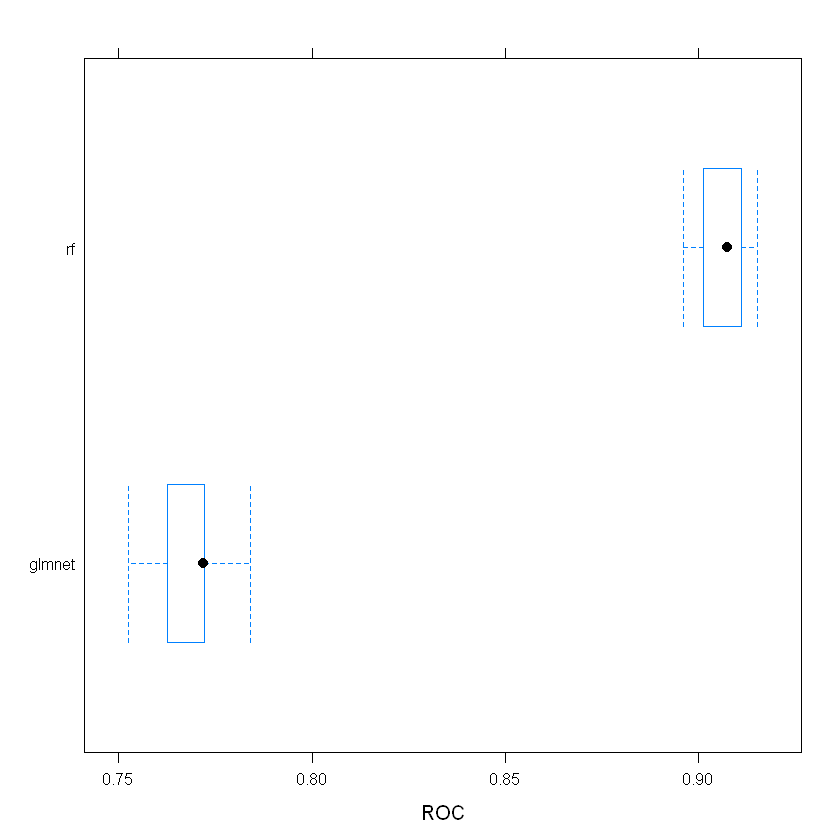

In [52]:
bwplot(resamps, metric = "ROC")

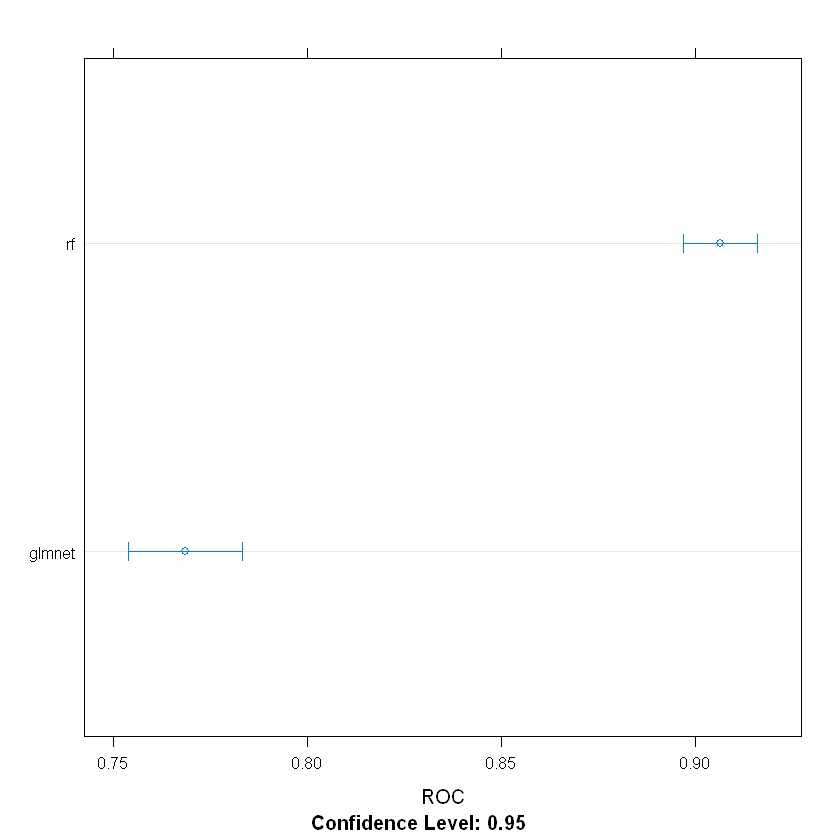

In [53]:
dotplot(resamps, metric = "ROC")

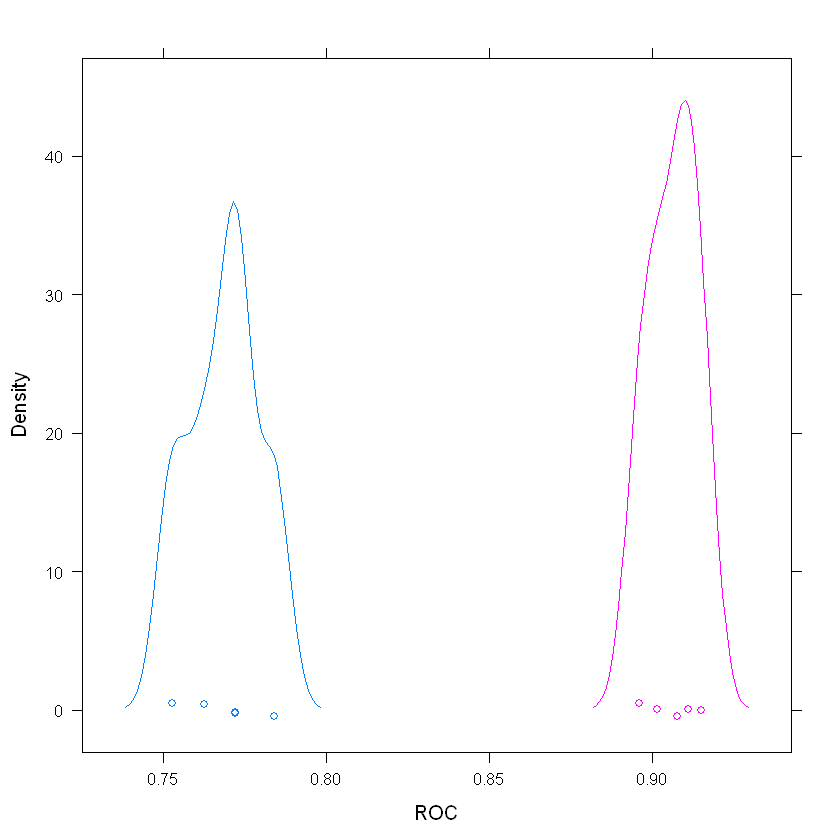

In [54]:
densityplot(resamps, metric = "ROC")

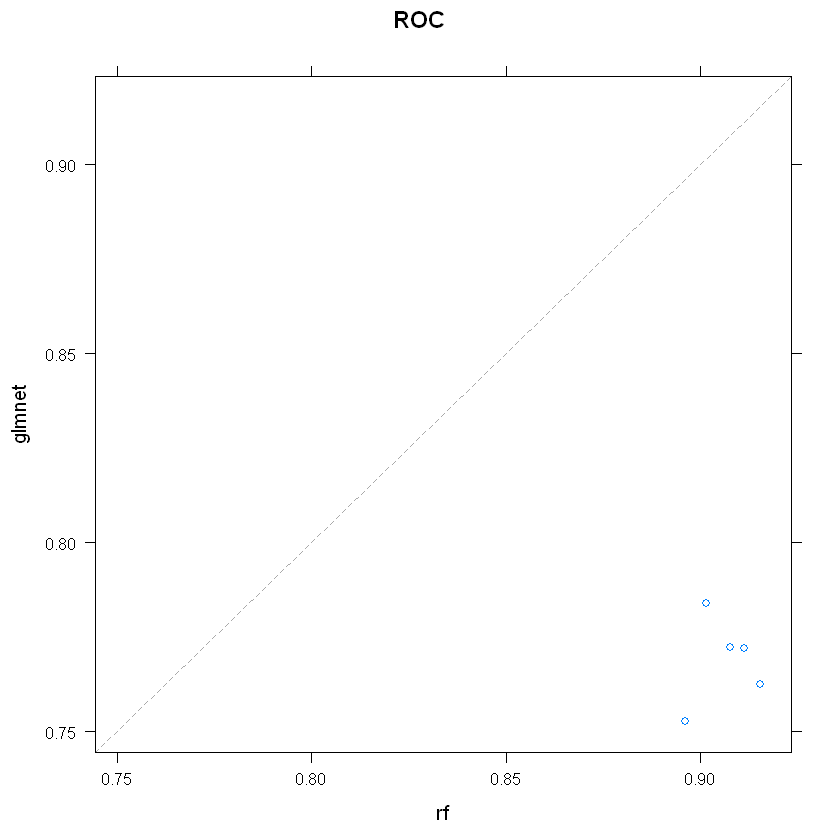

In [55]:
xyplot(resamps, metric = "ROC")